### Step 4: Data Analysis (Descriptve Analysis)

In Data Analysis Step, we’ll connect to the SQLite database, query the data as needed, and then perform various aggregations and analyses.

1. **Setup and Imports** 

In [1]:
# Import libraries
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style for consistency
sns.set(style="whitegrid")


2. **Database Connection and Retrieval** 

*Connecting to the SQLite database and load the data into a DataFrame:*

In [2]:
# Connect to the SQLite database
conn = sqlite3.connect('retail_data.db')

# Query to fetch all data
query = "SELECT * FROM retail_data;"
df = pd.read_sql(query, conn)

# Display first few rows 
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Day of Week,Season,Calculated Total
0,1,2023-11-24 00:00:00,CUST001,Male,34,Beauty,3,50,150,Friday,Autumn,150
1,2,2023-02-27 00:00:00,CUST002,Female,26,Clothing,2,500,1000,Monday,Winter,1000
2,3,2023-01-13 00:00:00,CUST003,Male,50,Electronics,1,30,30,Friday,Winter,30
3,4,2023-05-21 00:00:00,CUST004,Male,37,Clothing,1,500,500,Sunday,Spring,500
4,5,2023-05-06 00:00:00,CUST005,Male,30,Beauty,2,50,100,Saturday,Spring,100


3. **Exploratory Data Analysis**

*Checking data summaries and basic statistics*

In [3]:
# Display basic information about the DataFrame
df.info()

# Display basic statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
 9   Day of Week       1000 non-null   object
 10  Season            1000 non-null   object
 11  Calculated Total  1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


,Transaction ID,Age,Quantity,Price per Unit,Total Amount,Calculated Total
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000,2000.000000


In [17]:
df['Product Category'].unique()

array(['Beauty', 'Clothing', 'Electronics'], dtype=object)

**Visualizations for EDA**:

* Sales Over Time: Visualize trends over the Date column.
* Product Categories: Show top categories by quantity or revenue.
* Customer Demographics: Examine trends across Gender.

**Summary statistics with Box Plots**

To understand distribution and detect any outliers in Quantity, Price per Unit, and Total Amount by observing the range, quartiles, and potential outliers.

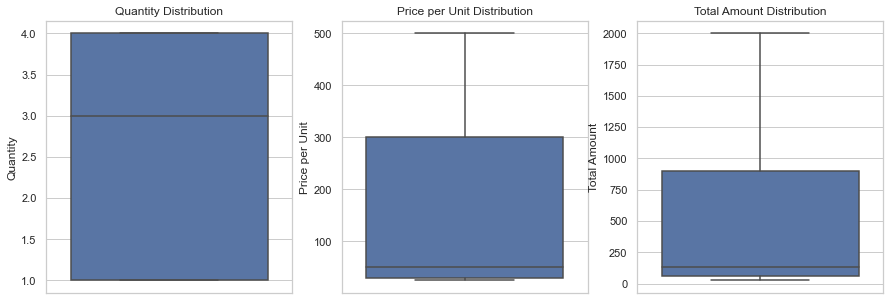

In [11]:
# Box plots for numerical columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(data=df, y='Quantity', ax=axes[0]).set_title('Quantity Distribution')
sns.boxplot(data=df, y='Price per Unit', ax=axes[1]).set_title('Price per Unit Distribution')
sns.boxplot(data=df, y='Total Amount', ax=axes[2]).set_title('Total Amount Distribution')
# plt.tight_layout()
plt.show()

*Observation/Interpretation:*

**2. Sales and Transaction Trends Over Time**

To visualize trends in sales and transaction frequency, identify seasonal patterns, and detect any peaks or dips.

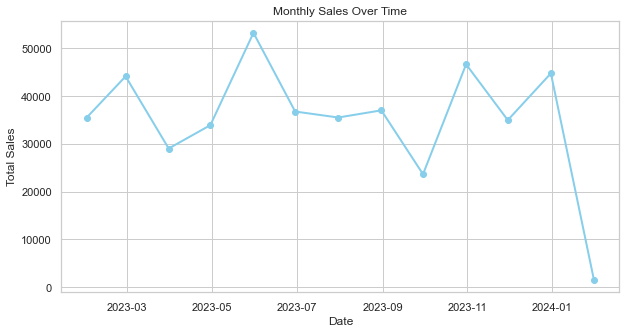

In [13]:
# Monthly sales trend
df['Date'] = pd.to_datetime(df['Date'])
monthly_sales = df.set_index('Date')['Total Amount'].resample('M').sum()

plt.figure(figsize=(10, 5))
plt.plot(monthly_sales, marker='o', color='skyblue', linewidth=2)
plt.title("Monthly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()

**3. Customer Demographics**

To show the proportion of sales by gender and examine spending behavior by customer segment.

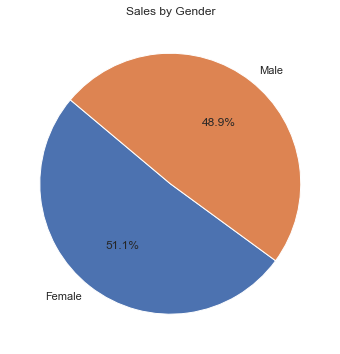

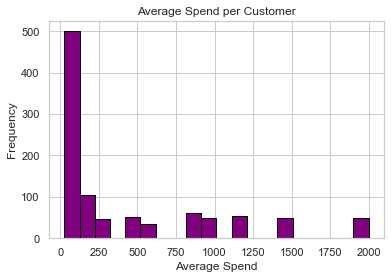

In [15]:
# Gender distribution in sales
gender_sales = df.groupby('Gender')['Total Amount'].sum()
gender_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140, figsize=(6, 6), title="Sales by Gender")
plt.ylabel("")  # Remove the y-axis label
plt.show()

# Average spending per customer
avg_spend = df.groupby('Customer ID')['Total Amount'].mean()
avg_spend.hist(bins=20, color='purple', edgecolor='black')
plt.title("Average Spend per Customer")
plt.xlabel("Average Spend")
plt.ylabel("Frequency")
plt.show()


4. **Top Selling Product Categories**

Identify the most popular and profitable product categories

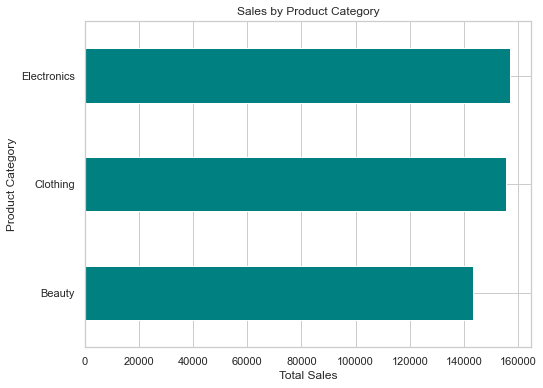

In [16]:
# Top-selling categories by total sales
category_sales = df.groupby('Product Category')['Total Amount'].sum().sort_values()
category_sales.plot(kind='barh', color='teal', figsize=(8, 6), title="Sales by Product Category")
plt.xlabel("Total Sales")
plt.ylabel("Product Category")
plt.show()


5. **Purchase Patterns**

Analyze average purchase quantities and transaction frequency to understand customer behavior.

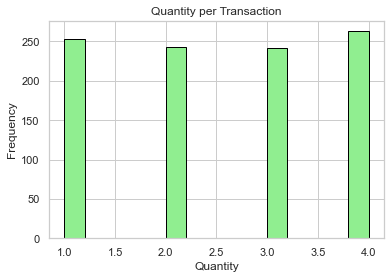

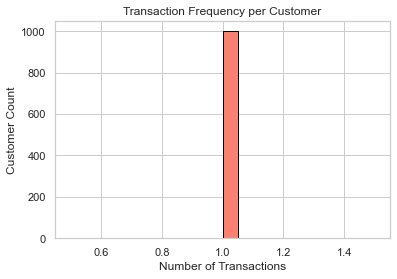

In [18]:
# Average quantity per transaction
df['Quantity'].hist(bins=15, color='lightgreen', edgecolor='black')
plt.title("Quantity per Transaction")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.show()

# Transaction frequency per customer
transaction_frequency = df['Customer ID'].value_counts()
transaction_frequency.plot(kind='hist', bins=20, color='salmon', edgecolor='black')
plt.title("Transaction Frequency per Customer")
plt.xlabel("Number of Transactions")
plt.ylabel("Customer Count")
plt.show()


In [6]:
# Close the database connection
conn.close()

**Explanation of the Analysis Steps**
* **Sales Over Time**: Visualizes trends in sales over the months or years.
* **Top Product Categories**: Highlights which categories bring in the most revenue.
* **Sales by Gender**: Helps understand customer demographics.
* **Customer Insights**: Identifies top customers or those with high transaction volumes.
* **Category Trends**: Shows which categories are most popular by quantity sold